#**Classification of Written Digits (MNIST Dataset)**

##**Import Libraries**

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import random

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from keras.models import Model

from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

##**Load MNIST Dataset**

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


###**Preprocess Data**

In [3]:
x_train = x_train.reshape(x_train.shape[0],28,28,1).astype('float32')
x_test = x_test.reshape(x_test.shape[0],28,28,1).astype('float32')
x_train /= 255
x_test /= 255

###**Display**

[43109, 8725, 57922, 39314, 3190, 20146, 53947, 32627, 948]


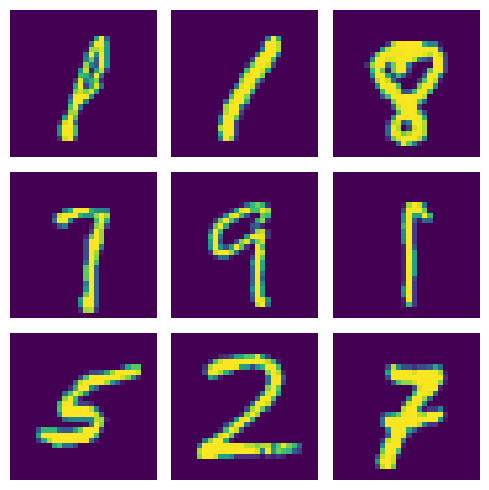

[[8 1 8]
 [7 9 1]
 [5 2 7]]


In [4]:
def show_random_images(num_images=9):
  # Select random indices
  indices = random.sample(range(len(x_train)), num_images)
  print(indices)

  # Reshape and normalize images
  x_images = x_train[indices].reshape(-1, 28, 28)
  y_label = y_train[indices]

  # Create a figure and subplots
  fig, axes = plt.subplots(3, 3, figsize=(5, 5))

  # Plot each image on a subplot
  for i, image in enumerate(x_images):
    axes[i // 3, i % 3].imshow(image)
    axes[i // 3, i % 3].axis('off')

  # Show the plot
  plt.tight_layout()
  plt.show()

  # Return corresponding labels
  print(y_label.reshape((3, 3)))

show_random_images()

###**One-hot encode labels**

In [5]:
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

###**Add validation**

In [6]:
(x_train, x_val, y_train, y_val) = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

##**Build and Train the Model**

###**Define the model architecture**

In [23]:
# from typing import FrozenSet
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1), name='conv2d'))
model.add(MaxPooling2D((2, 2), name='maxpool'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

###**Compile the model**

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

###**Train the model**

In [9]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/10
1688/1688 [==============================] - 54s 30ms/step - loss: 0.1662 - accuracy: 0.9505 - val_loss: 0.0701 - val_accuracy: 0.9802
Epoch 2/10
1688/1688 [==============================] - 38s 22ms/step - loss: 0.0558 - accuracy: 0.9826 - val_loss: 0.0539 - val_accuracy: 0.9827
Epoch 3/10
1688/1688 [==============================] - 38s 23ms/step - loss: 0.0353 - accuracy: 0.9894 - val_loss: 0.0514 - val_accuracy: 0.9848
Epoch 4/10
1688/1688 [==============================] - 39s 23ms/step - loss: 0.0236 - accuracy: 0.9927 - val_loss: 0.0438 - val_accuracy: 0.9872
Epoch 5/10
1688/1688 [==============================] - 38s 22ms/step - loss: 0.0153 - accuracy: 0.9951 - val_loss: 0.0425 - val_accuracy: 0.9893
Epoch 6/10
1688/1688 [==============================] - 36s 21ms/step - loss: 0.0105 - accuracy: 0.9968 - val_loss: 0.0435 - val_accuracy: 0.9885
Epoch 7/10
1688/1688 [==============================] - 37s 22ms/step - loss: 0.0087 - accuracy: 0.9971 - val_loss: 0.0458 -

##**Evaluate the model**

In [10]:
print(model.summary())
loss, accuracy = model.evaluate(x_test, y_test)
print('Test Accuracy: ', accuracy)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

###**Plot the loss and accuracy**

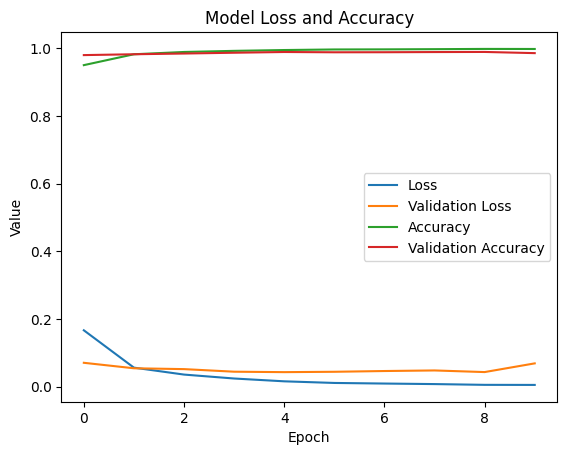

In [11]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Model Loss and Accuracy')
plt.legend()
plt.show()

###**Display the confusion matrix**

313/313 [==============================] - 3s 8ms/step


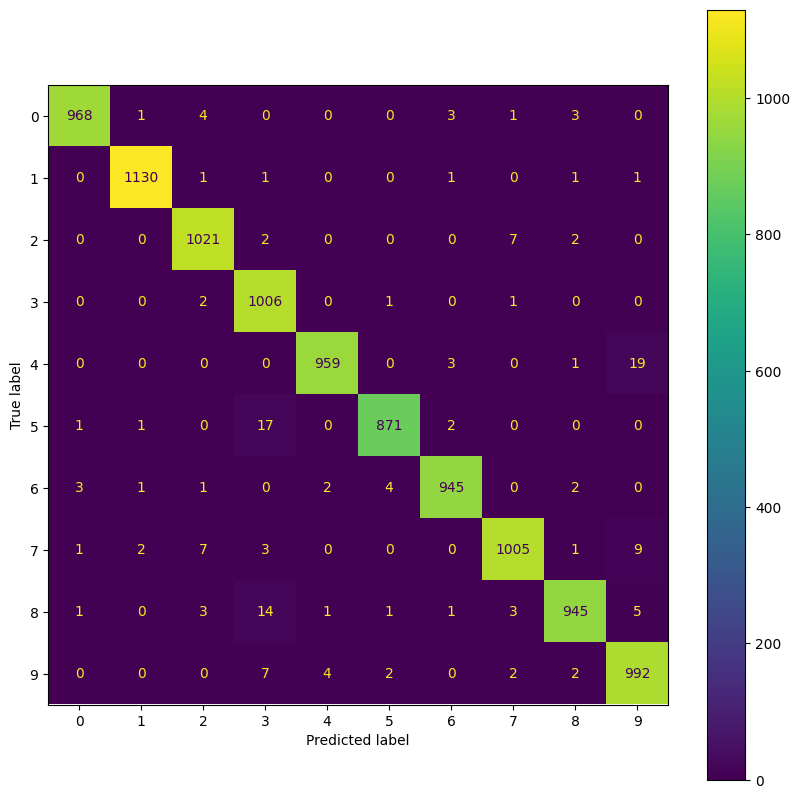

In [12]:
# Get predictions and true labels
y_pred = model.predict(x_test).argmax(axis=1)
y_true = y_test.argmax(axis=1)

# Display the confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax)

###**Display incorrect predictions**

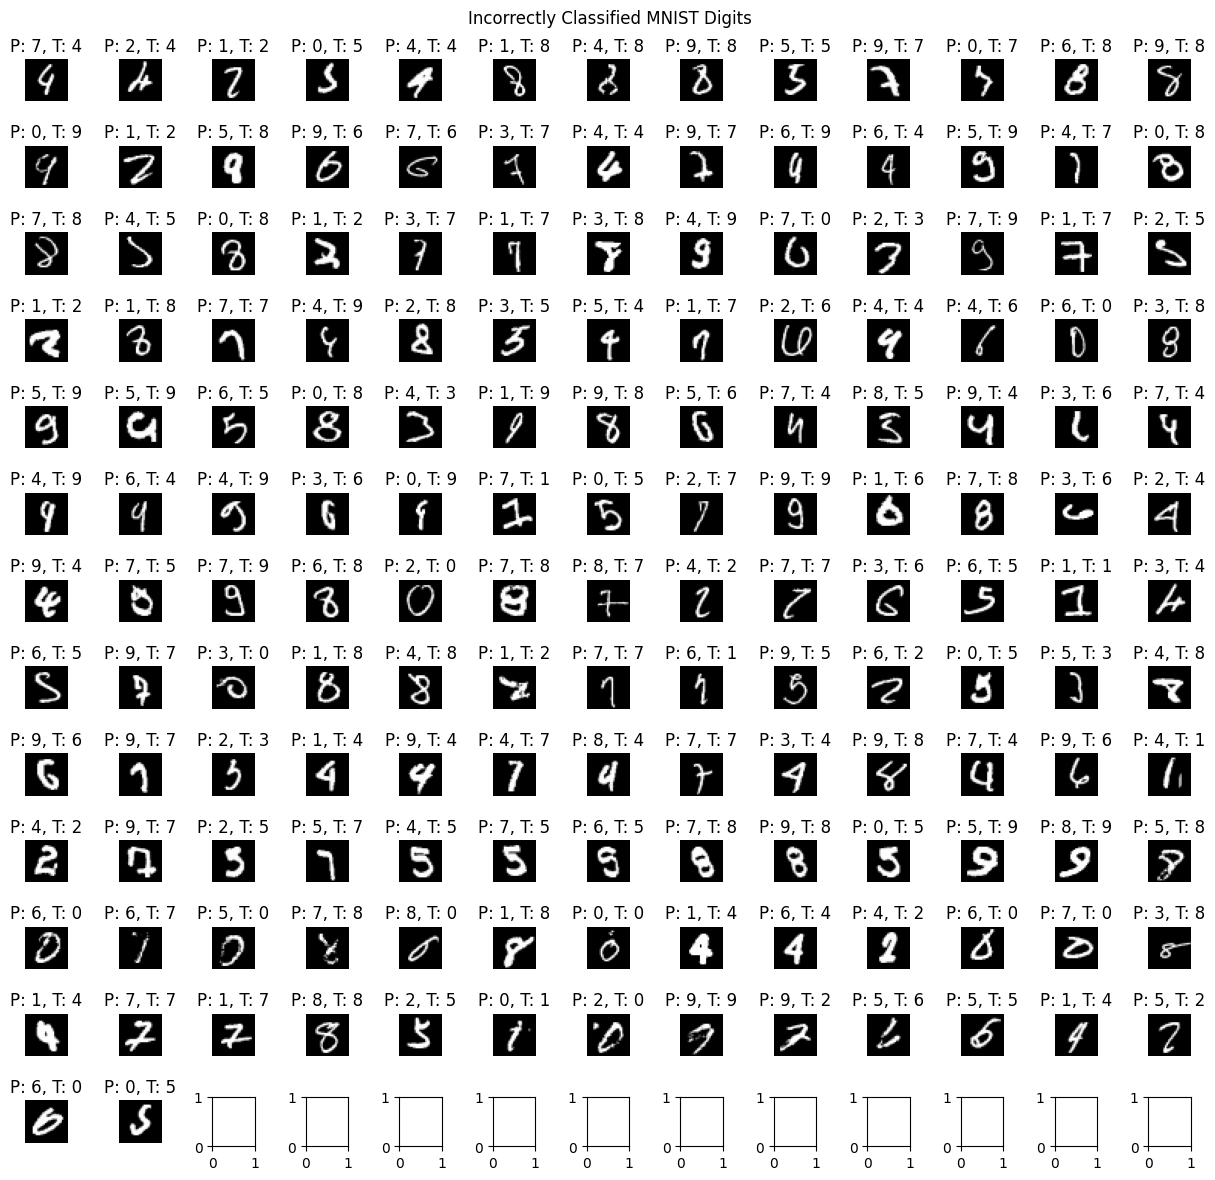

In [13]:
# Identify incorrect predictions
incorrect_indices = np.where(y_pred != y_true)[0]

# Define a function to plot images with labels
def plot_images_with_labels(images, labels, title=None):
  num_images = len(images)
  rows = int(np.ceil(np.sqrt(num_images)))
  cols = int(np.ceil(num_images / rows))

  fig, axes = plt.subplots(rows, cols, figsize=(12, 12))
  for i, (image, label) in enumerate(zip(images, labels)):
    row = i // cols
    col = i % cols
    axes[row, col].imshow(image, cmap='gray')
    axes[row, col].set_title(f"P: {y_pred[i]}, T: {label}")
    axes[row, col].axis('off')

  if title:
    fig.suptitle(title)
  plt.tight_layout()
  plt.show()

# Extract and plot incorrect predictions
incorrect_images = x_test[incorrect_indices]
incorrect_labels = y_test[incorrect_indices].argmax(axis=1)
plot_images_with_labels(incorrect_images, incorrect_labels, title="Incorrectly Classified MNIST Digits")

##**Visualizing intermediate activations**

###**Building the activation model**

In [40]:
layer_outputs = [layer.output for layer in model.layers[0:5]]
activation_model = Model(inputs=model.input,outputs=layer_outputs)

###**Choosing a random image from the test dataset on which we will use our activation model**

(-0.5, 27.5, 27.5, -0.5)

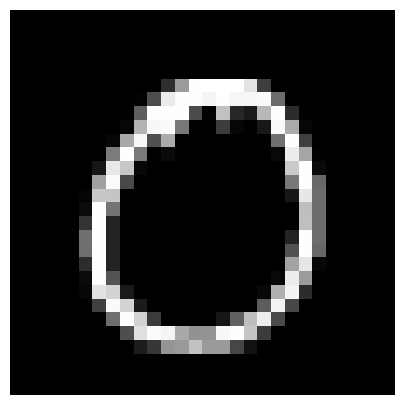

In [41]:
num = random.sample(range(len(x_test)), 1)
img = x_test[num].reshape(1,28,28,1)
fig = plt.figure(figsize=(5,5))
plt.imshow(img[0,:,:,0],cmap="gray")
plt.axis('off')

###**Output activations from selected layers**

In [42]:
activations = activation_model.predict(img)

1/1 [==============================] - 0s 88ms/step


###**Visualization of the activation layers**

['dense_2', 'dense_3']
(1, 26, 26, 32)
(1, 13, 13, 32)


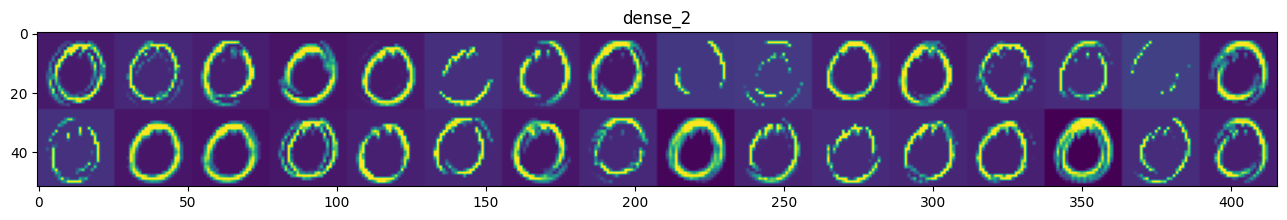

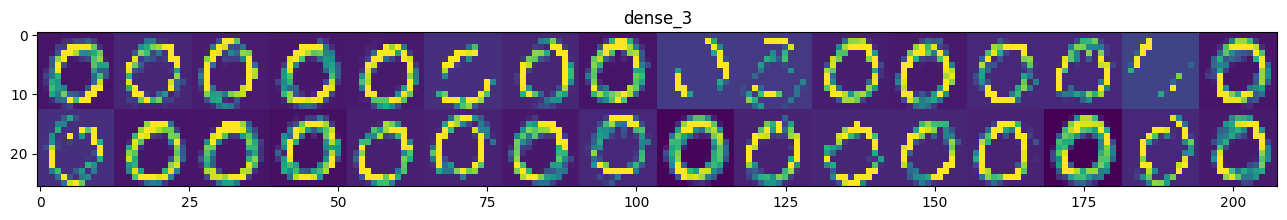

In [46]:
layer_names = []
for layer in model.layers[3:5]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
print(layer_names)

images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    print(layer_activation.shape)
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')